## 2019 disease tracking 

In [1]:
library(tidyverse)
library(vegan)
library(phyloseq)
library(dplyr)
library(ggplot2)
library(stringr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute

Loading required package: lattice

This is vegan 2.6-5



In [2]:
# Graph of colonies that died/got diseased across the years
# x-axis year
# y-axis # of colonies
# stacked bar colors: healthy, diseased, dead

In [3]:
# 1st: create columns for each year 
# pull info from diseaseddate
# if healthy, write healthy in each column
# if date, write "diseased" in corresponding column, and "healthy" in previous years columns
# repeat for mortality 

In [4]:
getwd()

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/CBC_metagenomics/Demographics"

In [5]:
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata')

In [6]:
colony_data <- read.csv('CBC_ColonyData.csv')

In [7]:
colony_data <- colony_data[, -1]

In [8]:
# extract year from Date_InitialTag and add it to new column
colony_data$Year_tagged <- format(as.Date(colony_data$Date_InitialTag, format="%m/%d/%y"), "%Y")

In [9]:
# drop X in col names 
colnames(colony_data)<-gsub("^X", "",colnames(colony_data) )

In [10]:
colnames(colony_data)

[1] "Date_InitialTag"          "Transect"                
 [3] "TransectNum"              "OldTagNum"               
 [5] "NewTagNum"                "Species"                 
 [7] "Meter"                    "Meters_90"               
 [9] "Direction"                "Size_Class"              
[11] "MaxDiameter"              "Height"                  
[13] "Date_DocumentedDisease"   "Date_DocumentedMortality"
[15] "Notes_062019"             "Notes_052022"            
[17] "Notes_092023"             "Notes_112023"            
[19] "Notes_122023"             "Notes_012024"            
[21] "Notes_022024"             "Notes_042024"            
[23] "062019_Condition"         "062019_Percentage"       
[25] "052022_Condition"         "052022_Percentage"       
[27] "122022_Condition"         "092023_Condition"        
[29] "092023_Percentage"        "112023_Condition"        
[31] "112023_Percentage"        "122023_Condition"        
[33] "122023_Percentage"        "012024_Condition"        
[35] "012024_Percentage"        "022024_Condition"        
[37] "022024_Percentage"        "042024_Condition"        
[39] "042024_Percentage"        "checked_colonies"        
[41] "062024_Condition"         "062024_Percentage"       
[43] "Notes_062024"             "Year_tagged"

In [11]:
head(colony_data)

,Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,012024_Percentage,022024_Condition,022024_Percentage,042024_Condition,042024_Percentage,checked_colonies,062024_Condition,062024_Percentage,Notes_062024,Year_tagged
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,5,⋯,,Diseased,,Diseased,,NA,Not_Visited,,,2019
2,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,4,⋯,,TL,90%,Not_Visited,,NA,Healthy,,not a lot left,2019
3,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,5,⋯,,Healthy,98%,"Healthy, DC","70%, 5%",x,Diseased,,"DC, sloughy, weird ssid disease",2019
4,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,3,⋯,,Dead,,Not_Visited,,NA,Not_Visited,,,2019
5,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,5,⋯,,Diseased,,Diseased,,NA,Not_Visited,,,2019
6,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,NA,⋯,,Dead,,Not_Visited,,NA,Not_Visited,,,2019


In [12]:
# get subset of colonies tagged in 2019 (to be able to track since the beginning)
colonies_2019 <- subset(colony_data, colony_data$Year_tagged=="2019")
head(colonies_2019)

,Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,012024_Percentage,022024_Condition,022024_Percentage,042024_Condition,042024_Percentage,checked_colonies,062024_Condition,062024_Percentage,Notes_062024,Year_tagged
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,5,⋯,,Diseased,,Diseased,,NA,Not_Visited,,,2019
2,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,4,⋯,,TL,90%,Not_Visited,,NA,Healthy,,not a lot left,2019
3,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,5,⋯,,Healthy,98%,"Healthy, DC","70%, 5%",x,Diseased,,"DC, sloughy, weird ssid disease",2019
4,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,3,⋯,,Dead,,Not_Visited,,NA,Not_Visited,,,2019
5,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,5,⋯,,Diseased,,Diseased,,NA,Not_Visited,,,2019
6,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,NA,⋯,,Dead,,Not_Visited,,NA,Not_Visited,,,2019


In [13]:
# drop NA in Date disease and mortality section
na<-is.na(colonies_2019$Date_DocumentedDisease)
na2 <- is.na(colonies_2019$Date_DocumentedMortality)
samples_to_delete <- na & na2
sum(samples_to_delete)

[1] 3

In [14]:
view_cols <- grep("Condition", colnames(colonies_2019), value = TRUE)

In [15]:
# first look at them to see why they have NAs
view_cols <- c(view_cols, c('NewTagNum','Species','Date_DocumentedDisease','Date_DocumentedMortality'))
colonies_2019[samples_to_delete,view_cols]
# looks like they were never found again after 2019, so removing FOR NOW

,062019_Condition,052022_Condition,122022_Condition,092023_Condition,112023_Condition,122023_Condition,012024_Condition,022024_Condition,042024_Condition,062024_Condition,NewTagNum,Species,Date_DocumentedDisease,Date_DocumentedMortality
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
80,Healthy,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,347,PAST,NA,NA
132,Healthy,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,12flag,PAST,NA,NA
133,Healthy,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,24,SSID,NA,NA


In [16]:
# Remove rows where both Date_DocumentedDisease and Date_DocumentedMortality are NA
#colonies_2019_delete <- colonies_2019 %>%
#  filter(!(is.na(Date_DocumentedDisease) & is.na(Date_DocumentedMortality)))
#nrow(colonies_2019_delete)
#tail(colonies_2019_delete)

In [17]:
# find rows with entries in COLONIES_TO_LOOK_AT

#questionable_colonies <- colonies_2019_delete %>%
 # filter(!is.na(COLONIES_TO_LOOK_AT) & COLONIES_TO_LOOK_AT != "")
# Display 
#questionable_colonies
# all mmea with no data on mortality, so deleting for now 
## update: 7/5 - already fixed 

In [18]:
# delete questionable colonies
## dont run 
#colonies_2019 <- colonies_2019_delete %>%
 # filter(is.na(COLONIES_TO_LOOK_AT) | COLONIES_TO_LOOK_AT == "")
#remove column too
#colonies_2019$COLONIES_TO_LOOK_AT <- NULL

#look at condition columns
condition_columns <- colonies_2019 %>%
  select(matches("Condition"))

head(colonies_2019[, c(names(condition_columns), "Date_DocumentedDisease", "Date_DocumentedMortality")])


,062019_Condition,052022_Condition,122022_Condition,092023_Condition,112023_Condition,122023_Condition,012024_Condition,022024_Condition,042024_Condition,062024_Condition,Date_DocumentedDisease,Date_DocumentedMortality
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Healthy,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Not_Visited,5/21/22,Diseased
2,Healthy,Healthy,Healthy,CLP,CLB,CLB,Dead,TL,Not_Visited,Healthy,Healthy,Healthy
3,Healthy,Diseased,Healthy,"CLP,DC","CLP,CLB",Healthy,Healthy,Healthy,"Healthy, DC",Diseased,5/21/22,Diseased
4,Healthy,Diseased,Dead,Dead,Dead,Dead,Dead,Dead,Not_Visited,Not_Visited,5/21/22,12/2/22
5,Healthy,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Not_Visited,5/21/22,Diseased
6,Healthy,Healthy,Diseased,Dead,Dead,Dead,Dead,Dead,Not_Visited,Not_Visited,12/2/22,9/25/23


### Graph for disease 2019 - 5/2023 

In [19]:
head(colonies_2019)
colnames(colonies_2019)

,Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,012024_Percentage,022024_Condition,022024_Percentage,042024_Condition,042024_Percentage,checked_colonies,062024_Condition,062024_Percentage,Notes_062024,Year_tagged
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,5,⋯,,Diseased,,Diseased,,NA,Not_Visited,,,2019
2,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,4,⋯,,TL,90%,Not_Visited,,NA,Healthy,,not a lot left,2019
3,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,5,⋯,,Healthy,98%,"Healthy, DC","70%, 5%",x,Diseased,,"DC, sloughy, weird ssid disease",2019
4,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,3,⋯,,Dead,,Not_Visited,,NA,Not_Visited,,,2019
5,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,5,⋯,,Diseased,,Diseased,,NA,Not_Visited,,,2019
6,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,NA,⋯,,Dead,,Not_Visited,,NA,Not_Visited,,,2019


[1] "Date_InitialTag"          "Transect"                
 [3] "TransectNum"              "OldTagNum"               
 [5] "NewTagNum"                "Species"                 
 [7] "Meter"                    "Meters_90"               
 [9] "Direction"                "Size_Class"              
[11] "MaxDiameter"              "Height"                  
[13] "Date_DocumentedDisease"   "Date_DocumentedMortality"
[15] "Notes_062019"             "Notes_052022"            
[17] "Notes_092023"             "Notes_112023"            
[19] "Notes_122023"             "Notes_012024"            
[21] "Notes_022024"             "Notes_042024"            
[23] "062019_Condition"         "062019_Percentage"       
[25] "052022_Condition"         "052022_Percentage"       
[27] "122022_Condition"         "092023_Condition"        
[29] "092023_Percentage"        "112023_Condition"        
[31] "112023_Percentage"        "122023_Condition"        
[33] "122023_Percentage"        "012024_Condition"        
[35] "012024_Percentage"        "022024_Condition"        
[37] "022024_Percentage"        "042024_Condition"        
[39] "042024_Percentage"        "checked_colonies"        
[41] "062024_Condition"         "062024_Percentage"       
[43] "Notes_062024"             "Year_tagged"

In [20]:
# select columns up to where disease stops and bleaching starts - 05/2023
disease_columns <- names(colonies_2019)[names(colonies_2019) %in% c('062019_Condition', '052022_Condition', '122022_Condition', '052023_Condition')]
disease_df<-colonies_2019[,disease_columns]
head(disease_df)

,062019_Condition,052022_Condition,122022_Condition
,<chr>,<chr>,<chr>
1,Healthy,Diseased,Diseased
2,Healthy,Healthy,Healthy
3,Healthy,Diseased,Healthy
4,Healthy,Diseased,Dead
5,Healthy,Diseased,Diseased
6,Healthy,Healthy,Diseased


In [21]:
convert_to_date <- function(col_name) {
  # Extract month and year from the column name
  month_year <- substr(col_name, 1, 6)
  month <- substr(month_year, 1, 2)
  year <- substr(month_year, 3, 6)
  
  # Define a vector of month abbreviations
  month_names <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
  
  # Get the month abbreviation using the month index
  month_name <- month_names[as.numeric(month)]
  
  # Construct and return the formatted date
  return(paste(month_name, year))
}

# Test the function with a sample column name
test_col_name <- "062019_Condition"
converted_date <- convert_to_date(test_col_name)
print(converted_date)  # Check the converted date


[1] "Jun 2019"


In [22]:
colnames(disease_df) <- sapply(colnames(disease_df), convert_to_date)
head(disease_df)

,Jun 2019,May 2022,Dec 2022
,<chr>,<chr>,<chr>
1,Healthy,Diseased,Diseased
2,Healthy,Healthy,Healthy
3,Healthy,Diseased,Healthy
4,Healthy,Diseased,Dead
5,Healthy,Diseased,Diseased
6,Healthy,Healthy,Diseased


In [23]:
#select datecondition columns 
# Find column names that contain "Condition"
condition_columns <- grep("Condition", names(colonies_2019), value = TRUE)
condition_columns

[1] "062019_Condition" "052022_Condition" "122022_Condition" "092023_Condition"
 [5] "112023_Condition" "122023_Condition" "012024_Condition" "022024_Condition"
 [9] "042024_Condition" "062024_Condition"

In [24]:
# create df with all conditions
condition_df<-colonies_2019[condition_columns]

In [25]:
# convert colnames (dates)
colnames(condition_df) <- sapply(colnames(condition_df), convert_to_date)
head(condition_df)

,Jun 2019,May 2022,Dec 2022,Sep 2023,Nov 2023,Dec 2023,Jan 2024,Feb 2024,Apr 2024,Jun 2024
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Healthy,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Not_Visited
2,Healthy,Healthy,Healthy,CLP,CLB,CLB,Dead,TL,Not_Visited,Healthy
3,Healthy,Diseased,Healthy,"CLP,DC","CLP,CLB",Healthy,Healthy,Healthy,"Healthy, DC",Diseased
4,Healthy,Diseased,Dead,Dead,Dead,Dead,Dead,Dead,Not_Visited,Not_Visited
5,Healthy,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Not_Visited
6,Healthy,Healthy,Diseased,Dead,Dead,Dead,Dead,Dead,Not_Visited,Not_Visited


In [26]:
# concatenate condition column with the rest of the columns I want to include in the df
disease_data <- cbind(disease_df, colonies_2019[,c("Date_InitialTag", "Transect", "Species", "MaxDiameter", "Height", "Year_tagged")])
head(disease_data)

,Jun 2019,May 2022,Dec 2022,Date_InitialTag,Transect,Species,MaxDiameter,Height,Year_tagged
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,Healthy,Diseased,Diseased,6/21/19,CBC30N,SSID,45,24,2019
2,Healthy,Healthy,Healthy,6/21/19,CBC30N,PAST,33,8,2019
3,Healthy,Diseased,Healthy,6/21/19,CBC30N,SSID,53,30,2019
4,Healthy,Diseased,Dead,10/15/19,CBC30N,PSTR,44,39,2019
5,Healthy,Diseased,Diseased,6/24/19,CBC30N,SSID,65,27,2019
6,Healthy,Healthy,Diseased,10/15/19,CBC30N,PSTR,35,38,2019


In [27]:
disease_data$'May 2022'

[1] "Diseased"    "Healthy"     "Diseased"    "Diseased"    "Diseased"   
  [6] "Healthy"     "Healthy"     "Diseased"    "Diseased"    "Diseased"   
 [11] "Diseased"    "Healthy"     "Healthy"     "Diseased"    "Diseased"   
 [16] "Diseased"    "Diseased"    "Healthy"     "Diseased"    "Healthy"    
 [21] "Healthy"     "Dead"        "Dead"        "Dead"        "Dead"       
 [26] "Dead"        "Dead"        "Healthy"     "Dead"        "Dead"       
 [31] "Dead"        "Healthy"     "Diseased"    "Diseased"    "Healthy"    
 [36] "Healthy"     "Healthy"     "Diseased"    "Dead"        "Healthy"    
 [41] "Healthy"     "Diseased"    "Healthy"     "Healthy"     "Healthy"    
 [46] "Healthy"     "Healthy"     "Healthy"     "Diseased"    "Diseased"   
 [51] "Healthy"     "Healthy"     "Diseased"    "Diseased"    "Healthy"    
 [56] "Healthy"     "Healthy"     "Diseased"    "Dead"        "Dead"       
 [61] "Dead"        "Dead"        "Dead"        "Dead"        "Not_Visited"
 [66] "Dead"        "Dead"        "Dead"        "Healthy"     "Diseased"   
 [71] "Healthy"     "Healthy"     "Healthy"     "Healthy"     "Healthy"    
 [76] "Dead"        "Healthy"     "Dead"        "Dead"        "Healthy"    
 [81] "Healthy"     "Diseased"    "Dead"        "Diseased"    "Diseased"   
 [86] "Diseased"    "Healthy"     "Healthy"     "Diseased"    "Diseased"   
 [91] "Healthy"     "Diseased"    "Dead"        "Diseased"    "Dead"       
 [96] "Dead"        "Healthy"     "Dead"        "Healthy"     "Healthy"    
[101] "Dead"        "Diseased"    "Diseased"    "Dead"        "Not_Visited"
[106] "Not_Visited"

In [28]:
# specify condition colors
condition_colors <- c("Healthy" = "darkgreen", "Diseased" = "coral", "Dead" = "brown4","Not_Visited" = 'darkgrey',
                      'CLB'="aliceblue",'CLP'="khaki",'DC'='blueviolet','Diseased_Other'='chocolate1','TL'='darkgoldenrod3')


In [29]:
head(disease_df)

,Jun 2019,May 2022,Dec 2022
,<chr>,<chr>,<chr>
1,Healthy,Diseased,Diseased
2,Healthy,Healthy,Healthy
3,Healthy,Diseased,Healthy
4,Healthy,Diseased,Dead
5,Healthy,Diseased,Diseased
6,Healthy,Healthy,Diseased


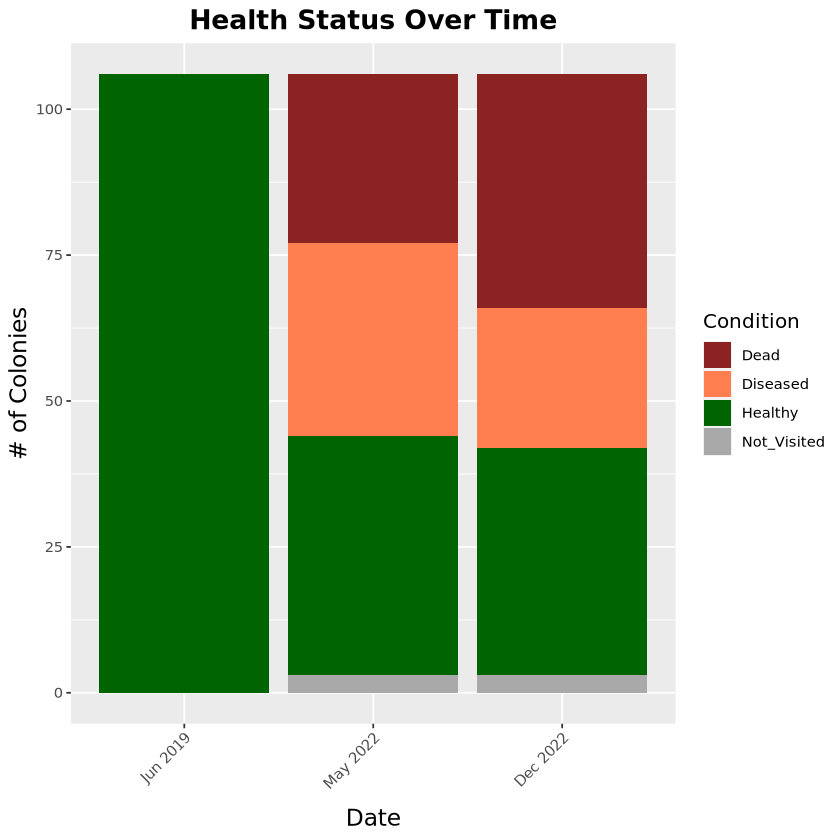

In [30]:
# Reshape the data for plotting
disease_df_long <- disease_df %>%
  mutate(year = rownames(disease_df)) %>%
  pivot_longer(-year, names_to = "month_year", values_to = "condition")

# Convert month_year to a factor with correct order of levels
disease_df_long <- disease_df_long %>%
  mutate(month_year = factor(month_year, levels = unique(month_year)))


# Plot the data with stacked bars and custom colors
disease_plot<-ggplot(disease_df_long, aes(x = month_year, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  # Stacked bars
  scale_fill_manual(values = condition_colors) +  # Custom fill colors
  labs(x = "Date", y = "# of Colonies", title = "Health Status Over Time", fill = "Condition") + # Custom legend title
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels
        axis.title = element_text(size = 14),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 12),  # Legend title settings
        plot.title = element_text(size = 16, hjust = 0.5, face = "bold")) 
disease_plot

In [31]:
head(disease_df_long)

year,month_year,condition
<chr>,<fct>,<chr>
1,Jun 2019,Healthy
1,May 2022,Diseased
1,Dec 2022,Diseased
2,Jun 2019,Healthy
2,May 2022,Healthy
2,Dec 2022,Healthy


In [32]:
getwd()

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata"

In [33]:
pdf("disease_plot.pdf")
print(disease_plot)
dev.off()

png 
  2

In [34]:
# plot colonies (tagged in 2019) health statuses through 2024 
# Reshape colonies_2019
colonies_2019_long <- condition_df %>%
  mutate(row = rownames(condition_df)) %>%
  pivot_longer(-row, names_to = "month_year", values_to = "condition")

In [35]:
colonies_2019_long <- condition_df %>%
  rownames_to_column(var = "rowname") %>%  # Add row names as a column
  pivot_longer(-rowname, names_to = "month_year", values_to = "condition")

In [36]:
# Separate multiple conditions into individual rows
colonies_parsed <- colonies_2019_long %>%
  separate_rows(condition, sep = ",\\s*") 

In [37]:
head(colonies_parsed)

rowname,month_year,condition
<chr>,<chr>,<chr>
1,Jun 2019,Healthy
1,May 2022,Diseased
1,Dec 2022,Diseased
1,Sep 2023,Diseased
1,Nov 2023,Diseased
1,Dec 2023,Diseased


In [38]:
# order based on date
colonies_parsed <- colonies_parsed %>%
  mutate(date = parse_date(paste("01", month_year), format = "%d %b %Y"))
# Order the data frame by the date column
colonies_ordered <- colonies_parsed %>%
  arrange(date) %>%
  select(-date)  # Remove the temporary date column if no longer needed
# Check the result
print(colonies_ordered)
#specify order for ggplot
colonies_ordered <- colonies_ordered %>%
  mutate(month_year = factor(month_year, levels = unique(colonies_ordered$month_year)))


# A tibble: 1,083 × 3
   rowname month_year condition
   <chr>   <chr>      <chr>    
 1 1       Jun 2019   Healthy  
 2 2       Jun 2019   Healthy  
 3 3       Jun 2019   Healthy  
 4 4       Jun 2019   Healthy  
 5 5       Jun 2019   Healthy  
 6 6       Jun 2019   Healthy  
 7 7       Jun 2019   Healthy  
 8 8       Jun 2019   Healthy  
 9 9       Jun 2019   Healthy  
10 10      Jun 2019   Healthy  
# ℹ 1,073 more rows


In [39]:
unique(colonies_2019_long$condition)

[1] "Healthy"          "Diseased"         "Not_Visited"      "CLP"             
 [5] "CLB"              "Dead"             "TL"               "CLP,DC"          
 [9] "CLP,CLB"          "Healthy, DC"      ""                 "Diseased,CLP,CLB"
[13] "Diseased, CLP"    "DC"               "TL,CLP"           "Diseased_Other"  
[17] "TL,CLB"           "CLB,TL"           "Diseased, DC"     "Diseased,DC"

In [40]:
options(repr.plot.width=20, repr.plot.height=10)

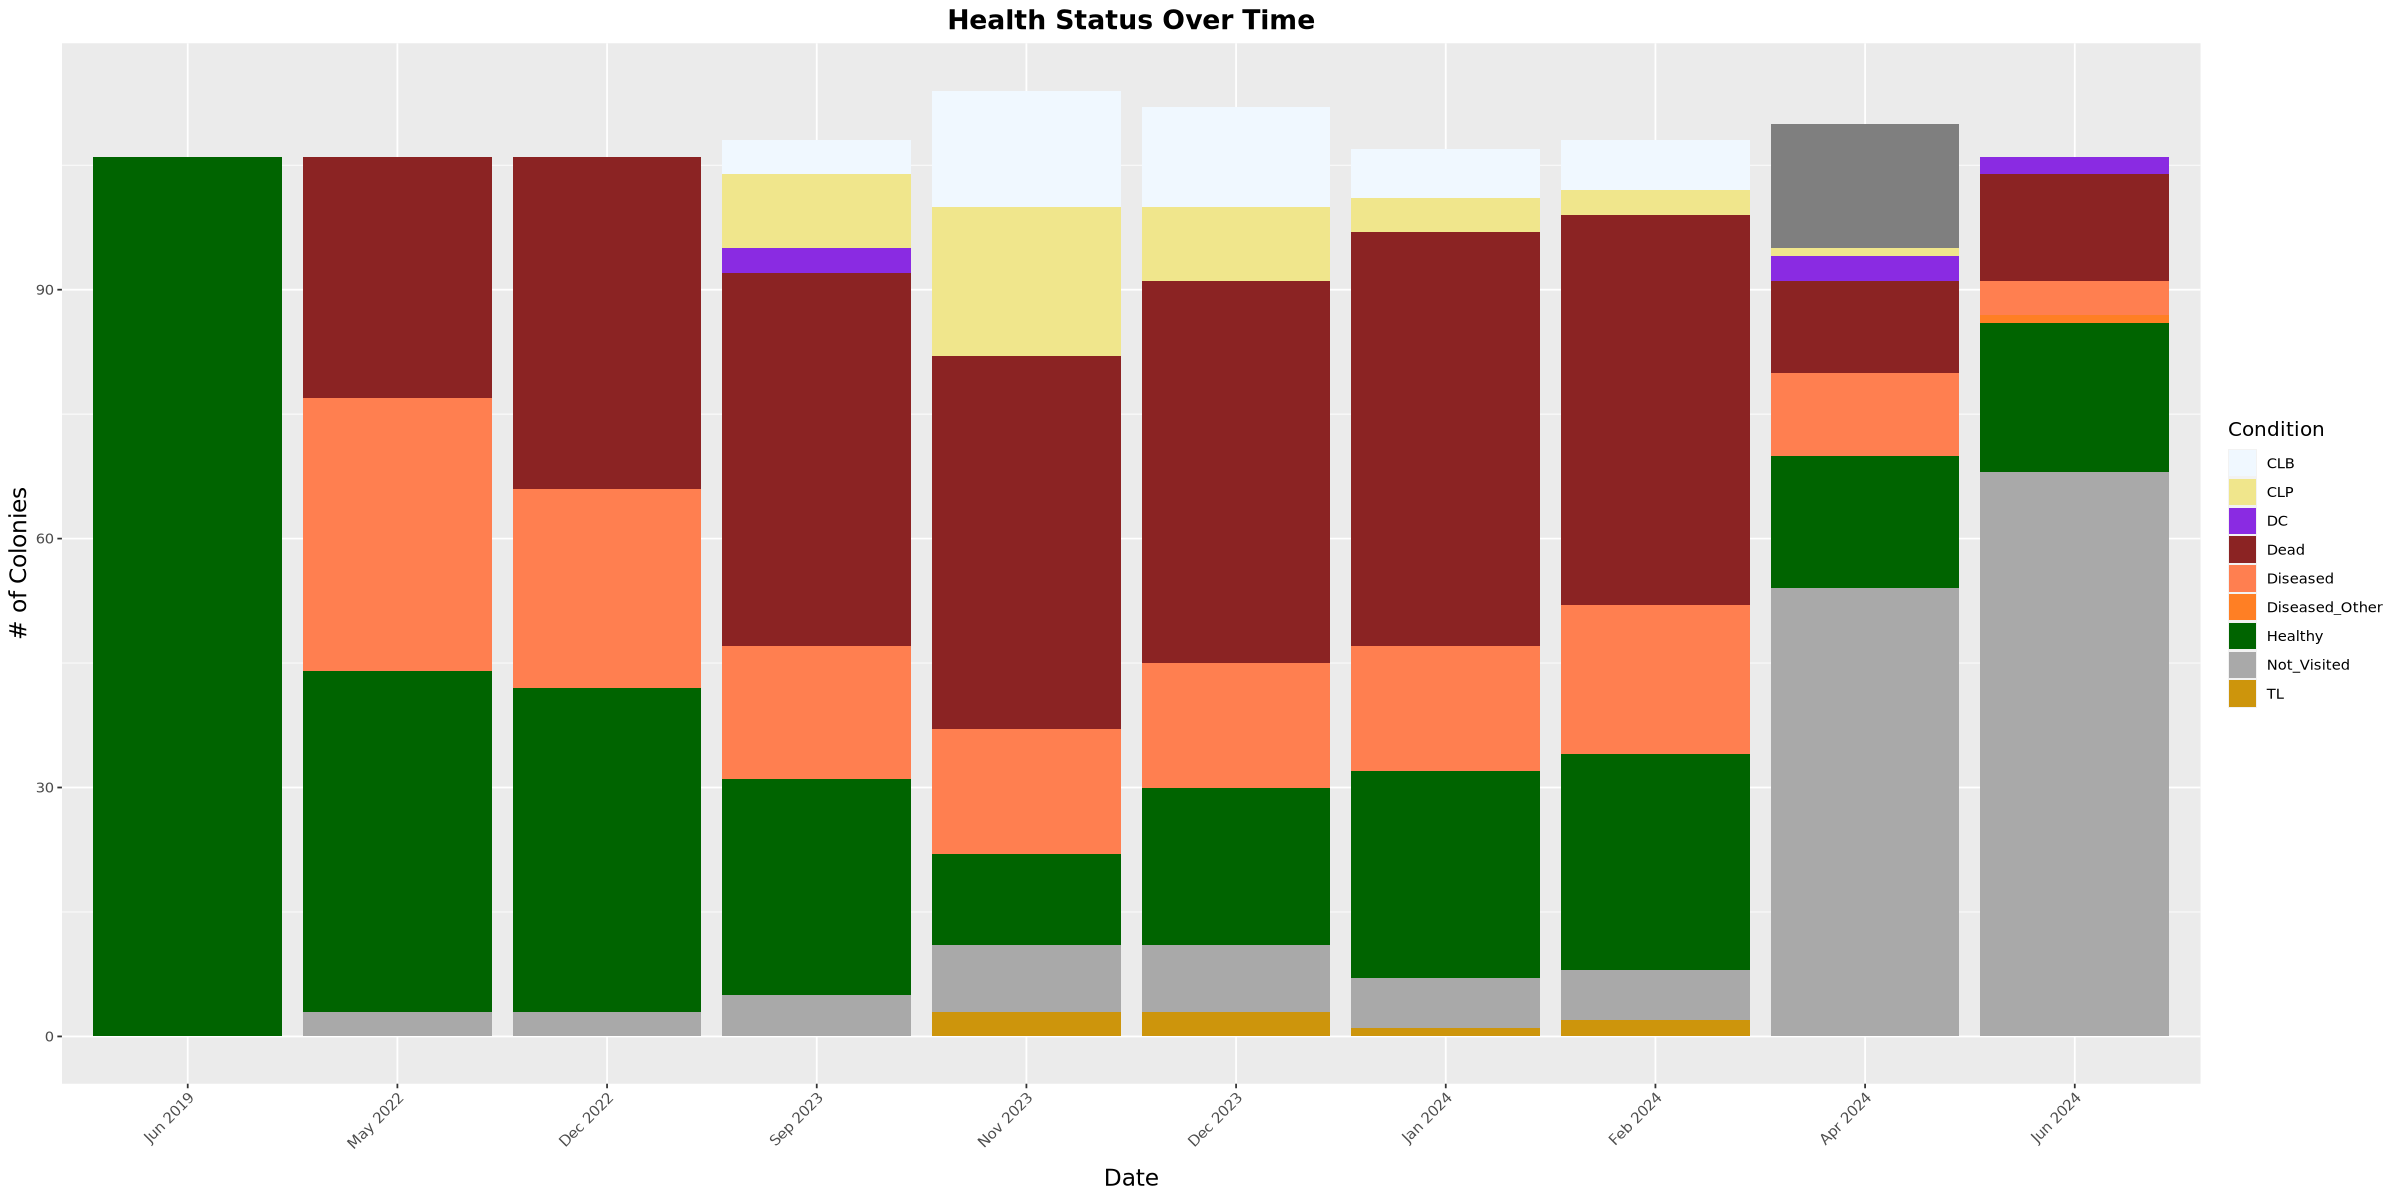

In [41]:
# Plot conditions over the years (only incl colonies tagged in 2019)
conditions_plot<-ggplot(colonies_ordered, aes(x = month_year, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  # Stacked bars
  scale_fill_manual(values = condition_colors) +  # Custom fill colors
  labs(x = "Date", y = "# of Colonies", title = "Health Status Over Time", fill = "Condition") + # Custom legend title
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels
        axis.title = element_text(size = 14),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 12),  # Legend title settings
        plot.title = element_text(size = 16, hjust = 0.5, face = "bold")) 
conditions_plot
# of colonies isn't consistent because some colonies have multiple conditions at a time..
# clearly need to go back through everything and incorporate not visited 
# but then need to make it so that not visited is replaced by last standing condition just for plotting?

## Species Disease Tracking

In [42]:
disease_data$Species

[1] "SSID" "PAST" "SSID" "PSTR" "SSID" "PSTR" "MCAV" "MCAV" "SSID" "SSID"
 [11] "SSID" "PSTR" "PAST" "MCAV" "MCAV" "SSID" "SSID" "MCAV" "PAST" "PAST"
 [21] "PAST" "MCAV" "MCAV" "MCAV" "MCAV" "MMEA" "MMEA" "PSTR" "PSTR" "PSTR"
 [31] "PSTR" "PAST" "SSID" "SSID" "MCAV" "PSTR" "MCAV" "PAST" "MCAV" "PAST"
 [41] "PSTR" "MCAV" "MCAV" "MCAV" "PSTR" "PAST" "CNAT" "PSTR" "SSID" "SSID"
 [51] "PAST" "MCAV" "PSTR" "SSID" "SSID" "SSID" "SSID" "SSID" "MMEA" "MMEA"
 [61] "MMEA" "MMEA" "MMEA" "MMEA" "PAST" "PSTR" "PSTR" "MMEA" "MCAV" "SSID"
 [71] "PSTR" "SSID" "PAST" "PAST" "PAST" "MCAV" "PAST" "PSTR" "MCAV" "PAST"
 [81] "MCAV" "MCAV" "PSTR" "MCAV" "PAST" "SSID" "PSTR" "MCAV" "MCAV" "SSID"
 [91] "PAST" "SSID" "MMEA" "SSID" "MMEA" "PSTR" "PSTR" "PSTR" "SSID" "PAST"
[101] "MMEA" "SSID" "SSID" "MMEA" "PAST" "SSID"

In [43]:
some_species <- subset(disease_data, Species != 'CNAT')

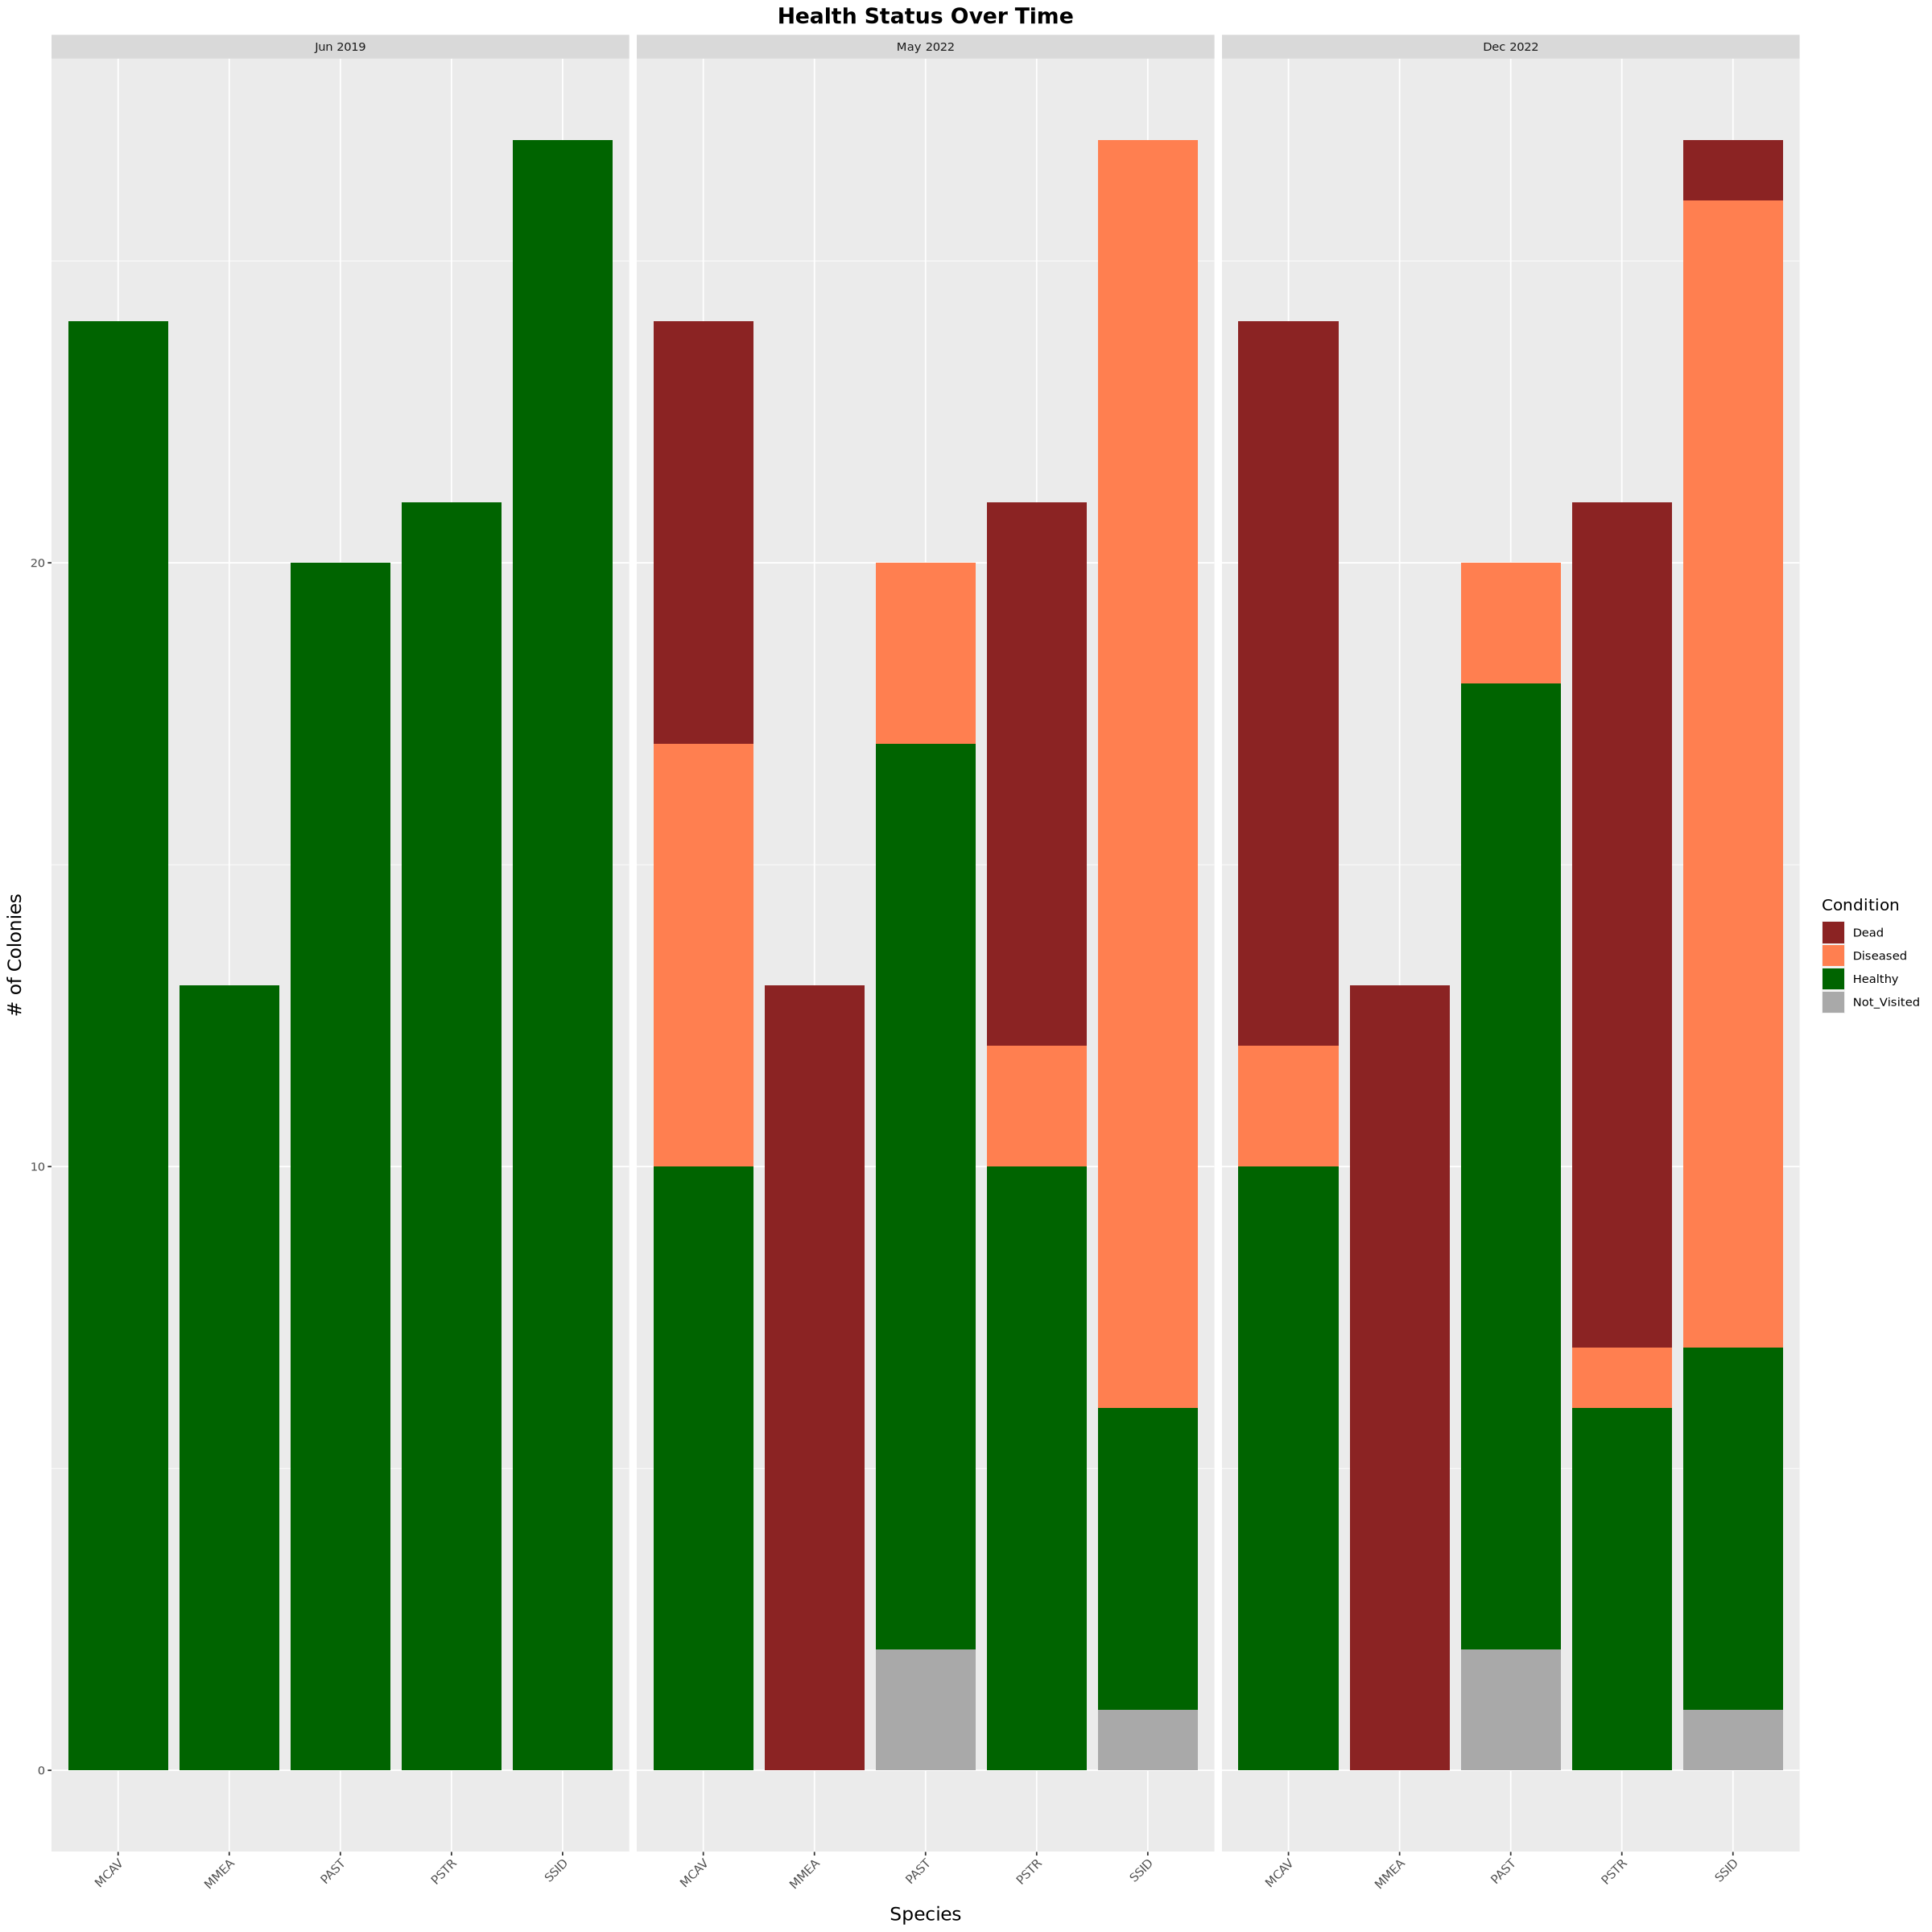

In [48]:
# Reshape the data for plotting
disease_data_long <- some_species %>%
  pivot_longer(cols = c("Jun 2019", "May 2022","Dec 2022"),
               names_to = "month_year",
               values_to = "condition")

# Convert month_year to a factor with correct order of levels
disease_data_long <- disease_data_long %>%
  mutate(month_year = factor(month_year, levels = unique(month_year)))

# Now you can proceed with plotting


# Plot the data with stacked bars and custom colors
species_plot <- ggplot(disease_data_long, aes(x = Species, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  # Side-by-side bars for each species
  scale_fill_manual(values = condition_colors) +  # Custom fill colors
  labs(x = "Species", y = "# of Colonies", title = "Health Status Over Time", fill = "Condition") + # Custom legend title
  facet_wrap(~month_year, nrow = 1, scales = "free_x") +  # Separate bars for each year
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels
        axis.title = element_text(size = 14),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 12),  # Legend title settings
        plot.title = element_text(size = 16, hjust = 0.5, face = "bold")) 
species_plot



In [45]:
pdf("species_plot.pdf")
print(species_plot)
dev.off()

png 
  2

In [46]:
disease_dec2022_long<-disease_data_long[disease_data_long$month_year!="May 2022",]

In [47]:
options(repr.plot.width=20, repr.plot.height=20)

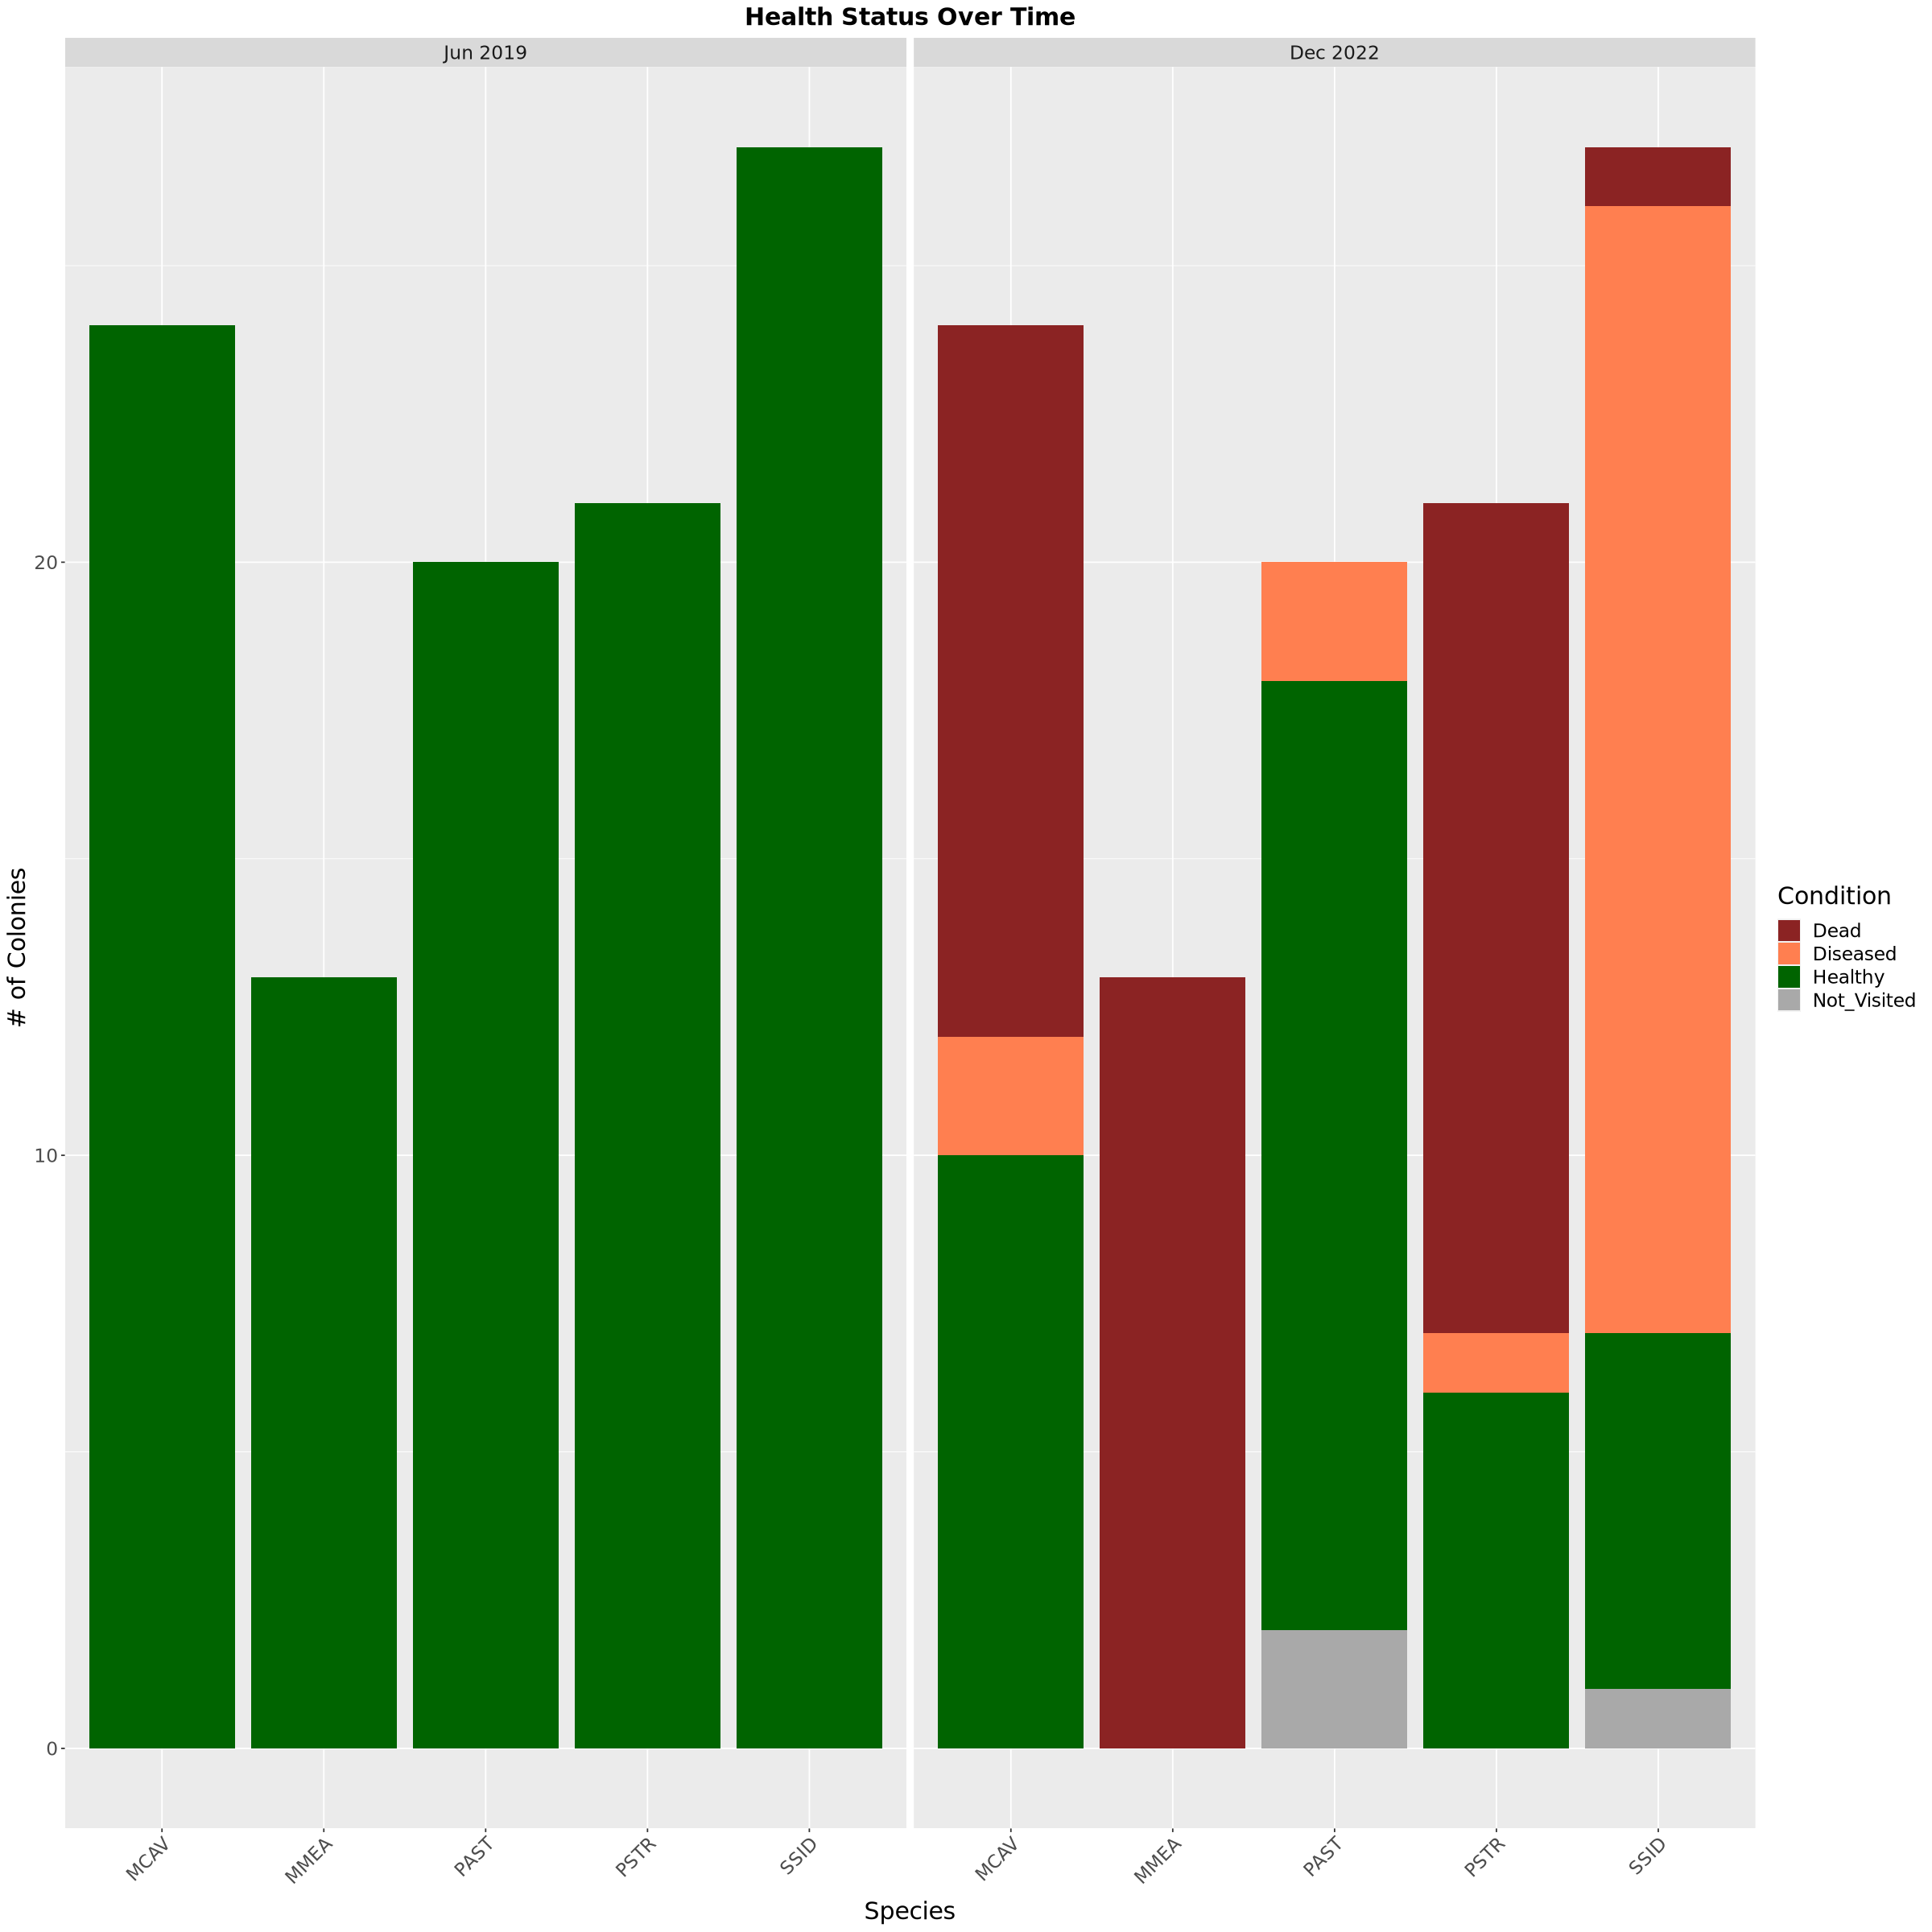

In [49]:
speciesdec_plot <- ggplot(disease_dec2022_long, aes(x = Species, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  # Side-by-side bars for each species
  scale_fill_manual(values = condition_colors) +  # Custom fill colors
  labs(x = "Species", y = "# of Colonies", title = "Health Status Over Time", fill = "Condition") + # Custom legend title
  facet_wrap(~month_year, nrow = 1, scales = "free_x") +  # Separate bars for each year
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),  # Rotate and increase x-axis labels
        axis.text.y = element_text(size = 14),  # Increase y-axis labels
        axis.title = element_text(size = 18),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 18),  # Legend title font size
        legend.text = element_text(size = 14),  # Increase legend text size
        plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
        strip.text = element_text(size = 14))  # Increase facet title text size

speciesdec_plot

In [57]:
pdf("speciesdec_plot.pdf")
print(speciesdec_plot)
dev.off()

png 
  2

In [50]:
disease_may2022_long<-disease_data_long[disease_data_long$month_year!="Dec 2022",]

In [51]:
options(repr.plot.width=20, repr.plot.height=20)

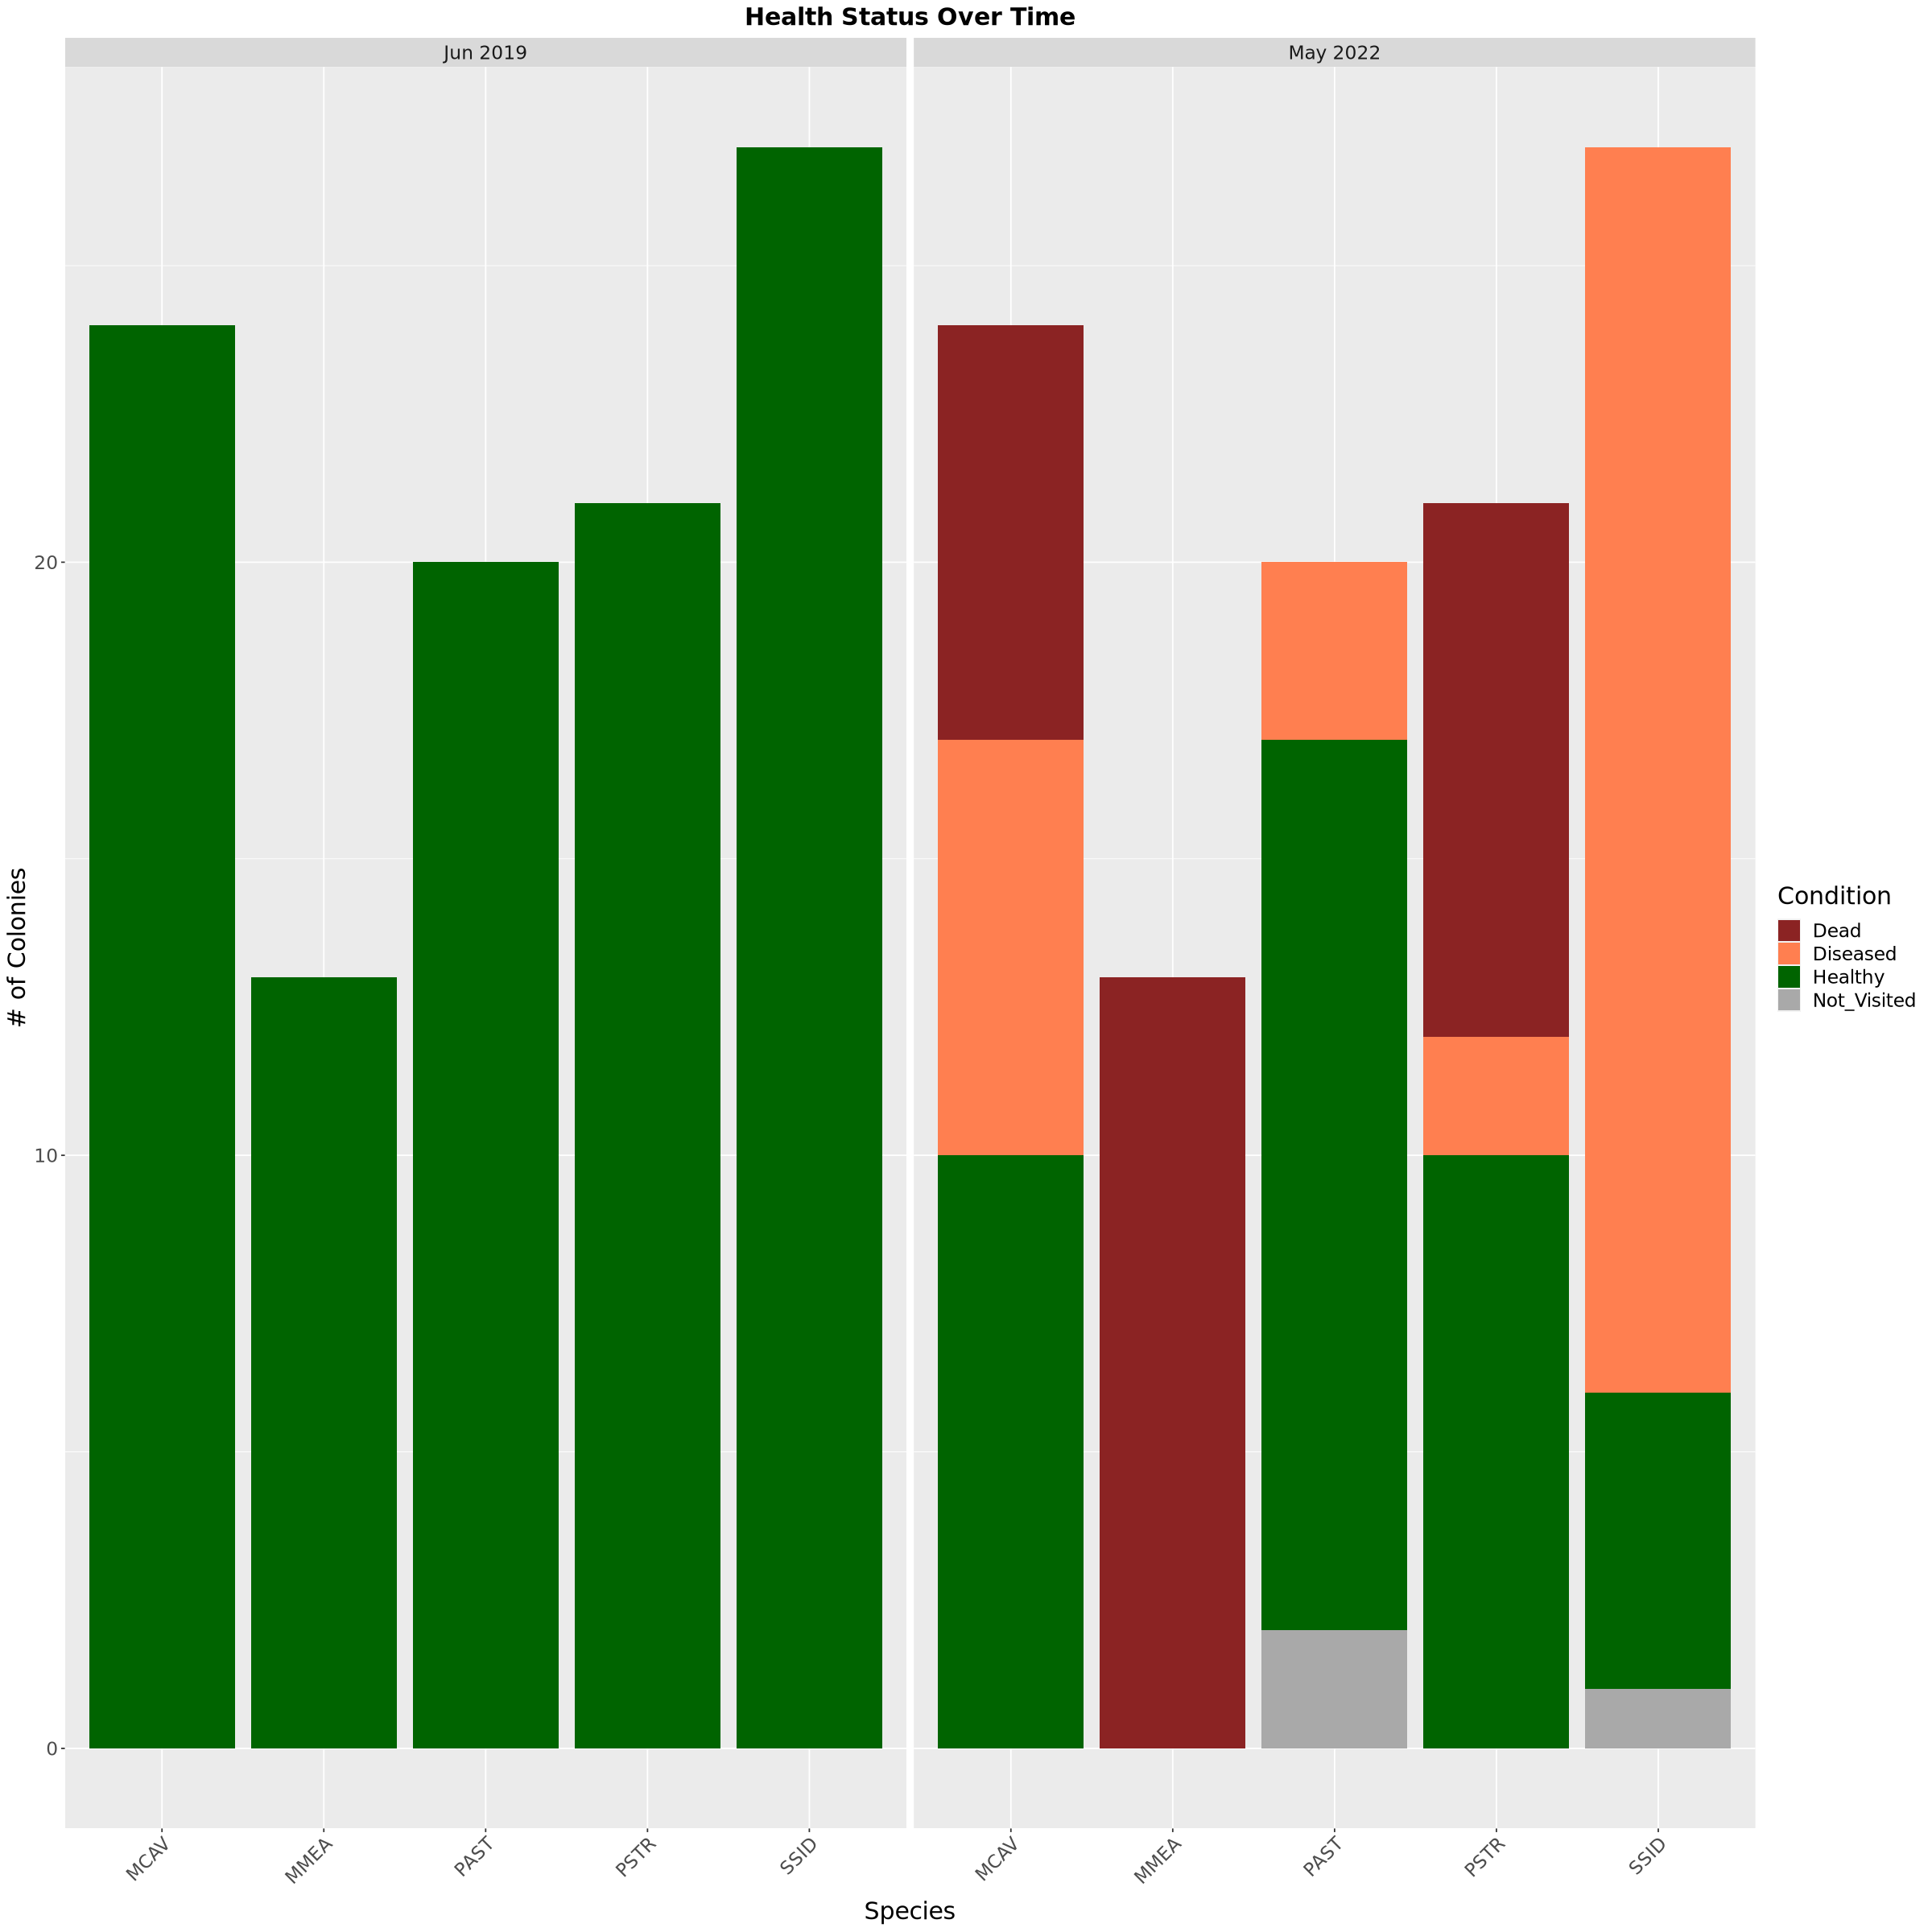

In [52]:
speciesmay_plot <- ggplot(disease_may2022_long, aes(x = Species, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  # Side-by-side bars for each species
  scale_fill_manual(values = condition_colors) +  # Custom fill colors
  labs(x = "Species", y = "# of Colonies", title = "Health Status Over Time", fill = "Condition") + # Custom legend title
  facet_wrap(~month_year, nrow = 1, scales = "free_x") +  # Separate bars for each year
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),  # Rotate and increase x-axis labels
        axis.text.y = element_text(size = 14),  # Increase y-axis labels
        axis.title = element_text(size = 18),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 18),  # Legend title font size
        legend.text = element_text(size = 14),  # Increase legend text size
        plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
        strip.text = element_text(size = 14))  # Increase facet title text size

speciesmay_plot

In [53]:
pdf("speciesmay_plot.pdf")
print(speciesmay_plot)
dev.off()

png 
  2

In [32]:
# look at na's 
colony_data[(is.na(colony_data["Year_tagged"])),]
# none left 

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,012024_Percentage,022024_Condition,022024_Percentage,042024_Condition,042024_Percentage,checked_colonies,062024_Condition,062024_Percentage,Notes_062024,Year_tagged
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [33]:
colnames(colony_data)

[1] "Date_InitialTag"          "Transect"                
 [3] "TransectNum"              "OldTagNum"               
 [5] "NewTagNum"                "Species"                 
 [7] "Meter"                    "Meters_90"               
 [9] "Direction"                "Size_Class"              
[11] "MaxDiameter"              "Height"                  
[13] "Date_DocumentedDisease"   "Date_DocumentedMortality"
[15] "Notes_062019"             "Notes_052022"            
[17] "Notes_092023"             "Notes_112023"            
[19] "Notes_122023"             "Notes_012024"            
[21] "Notes_022024"             "Notes_042024"            
[23] "062019_Condition"         "062019_Percentage"       
[25] "052022_Condition"         "052022_Percentage"       
[27] "122022_Condition"         "092023_Condition"        
[29] "092023_Percentage"        "112023_Condition"        
[31] "112023_Percentage"        "122023_Condition"        
[33] "122023_Percentage"        "012024_Condition"        
[35] "012024_Percentage"        "022024_Condition"        
[37] "022024_Percentage"        "042024_Condition"        
[39] "042024_Percentage"        "checked_colonies"        
[41] "062024_Condition"         "062024_Percentage"       
[43] "Notes_062024"             "Year_tagged"

In [34]:
#remove colonies with 'na' in year_tagged
#colony_data <- drop_na(colony_data,"Year_tagged")
# remove colonies tagged in 2024 
colony_no2024 <- subset(colony_data, Year_tagged!=2024) 

In [35]:
#filter for disease in 2022
disease_2022_count <- colony_no2024 %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedDisease))

#filter for death in 2022
death_2022_count <- colony_no2024 %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedMortality)) 
percent_disease <- (nrow(disease_2022_count)/nrow(colony_no2024))*100
percent_mortality <- (nrow(death_2022_count)/nrow(colony_no2024))*100

cat("Percent of colonies that got diseased in 2022:", percent_disease,'%')
cat("
Percent of colonies that died in 2022:", percent_mortality,'%')
cat("
Total percentage of colonies affected by sctld:", percent_disease+percent_mortality,'%')

Percent of colonies that got diseased in 2022: 30.66667 %
Percent of colonies that died in 2022: 27.33333 %
Total percentage of colonies affected by sctld: 58 %

In [36]:
#Goal: calculate % of mcav that got disease from 2019 to 2022

In [37]:
# sort for mcav only 
colony_mcav <- subset(colony_no2024, Species=="MCAV") 

In [38]:
#filter for disease in 2022
disease_mcav2022_count <- colony_mcav %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedDisease))

death_mcav2022_count <- colony_mcav %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedMortality)) 
mcav_dis<-(nrow(disease_mcav2022_count)/nrow(colony_mcav))*100
mcav_ded<- (nrow(death_mcav2022_count)/nrow(colony_mcav))*100

cat("Percent of mcav colonies that got diseased in 2022:",mcav_dis ,'%')
cat("
Percent of mcav colonies that died in 2022:",mcav_ded, '%')
cat("
Total percentage of mcav colonies affected by sctld:", mcav_dis+mcav_ded,'%')

Percent of mcav colonies that got diseased in 2022: 32.25806 %
Percent of mcav colonies that died in 2022: 38.70968 %
Total percentage of mcav colonies affected by sctld: 70.96774 %

In [39]:
# sort for past only 
colony_past <- subset(colony_no2024, Species=="PAST") 

In [41]:
# sort for PSTR only 
colony_pstr <- subset(colony_no2024, Species=="PSTR") 
#filter for disease in 2022
disease_pstr2022_count <- colony_pstr %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedDisease))

death_pstr2022_count <- colony_pstr %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedMortality)) 
pstr_dis<- (nrow(disease_pstr2022_count)/nrow(colony_pstr))*100
pstr_ded<- (nrow(death_pstr2022_count)/nrow(colony_pstr))*100

cat("Percent of pstr colonies that got diseased in 2022:",pstr_dis ,'%')
cat("
Percent of pstr colonies that died in 2022:", pstr_ded,'%')
cat("
Total percentage of pstr colonies affected by sctld:", pstr_dis+pstr_ded,'%')

Percent of pstr colonies that got diseased in 2022: 19.35484 %
Percent of pstr colonies that died in 2022: 45.16129 %
Total percentage of pstr colonies affected by sctld: 64.51613 %

In [40]:
#filter for disease in 2022
disease_past2022_count <- colony_past %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedDisease))

death_past2022_count <- colony_past %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedMortality)) 

cat("Percent of past colonies that got diseased in 2022:", (nrow(disease_past2022_count)/nrow(colony_past))*100,'%')
cat("
Percent of past colonies that died in 2022:", (nrow(death_past2022_count)/nrow(colony_past))*100,'%')
#nrow(colony_mcav)

Percent of past colonies that got diseased in 2022: 15 %
Percent of past colonies that died in 2022: 5 %